# 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
from datetime import datetime, timedelta

In [4]:
import yfinance as yf

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
start = datetime(2018,1,1)
end = datetime(2023, 11, 23)

In [7]:
google = yf.Ticker('GOOG')
msft=yf.Ticker('MSFT')
appl=yf.Ticker('AAPL')
amzn=yf.Ticker('AMZN')

In [8]:
google_df = google.history(start=start, end=end)
msft_df = msft.history(start=start, end=end)
appl_df=appl.history(start=start, end=end)
amzn_df=amzn.history(start=start, end=end)

# 2. Pre-processing

In [9]:
g_returns = 100 * google_df[['Close']].pct_change().dropna() 
ms_returns = 100 * msft_df[['Close']].pct_change().dropna() 
appl_returns=100 * appl_df[['Close']].pct_change().dropna() 
amzn_returns=100 * amzn_df[['Close']].pct_change().dropna() 

In [10]:
g_vol = g_returns**2
ms_vol = ms_returns**2
appl_vol=appl_returns**2
amzn_vol=amzn_returns**2

In [17]:
df_all = pd.concat([g_vol, ms_vol, appl_vol, amzn_vol], axis=1)

df_all.columns = ['Google', 'Microsoft', 'Apple', 'Amazon']

df_all.head()

,Google,Microsoft,Apple,Amazon
Date,,,,
2018-01-03 00:00:00-05:00,2.693917,0.216576,0.000304,1.632086
2018-01-04 00:00:00-05:00,0.131138,0.774675,0.215752,0.200347
2018-01-05 00:00:00-05:00,2.123159,1.537100,1.296266,2.612269
2018-01-08 00:00:00-05:00,0.182599,0.010412,0.137955,2.080714
2018-01-09 00:00:00-05:00,0.003774,0.004618,0.000132,0.218623


### Decomposition

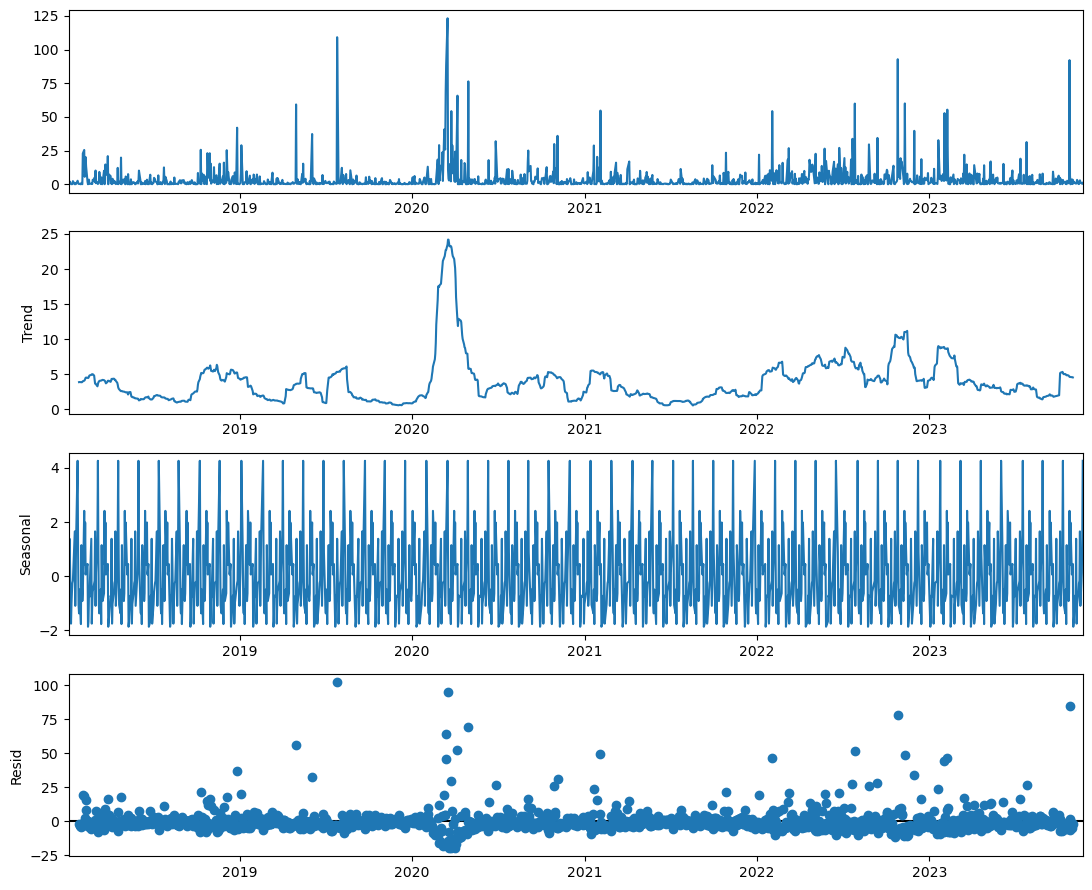

In [14]:
from pylab import rcParams

# Google

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(g_vol,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

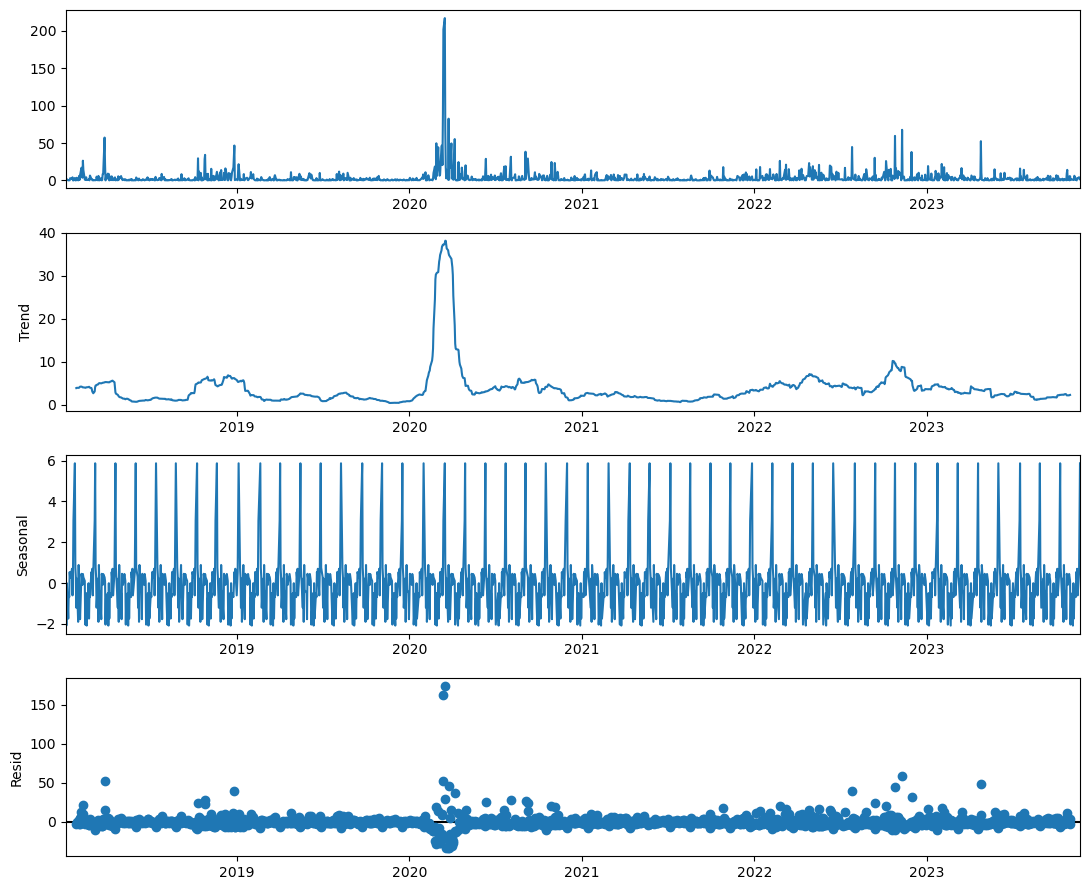

In [15]:
# Microsoft
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(ms_vol,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

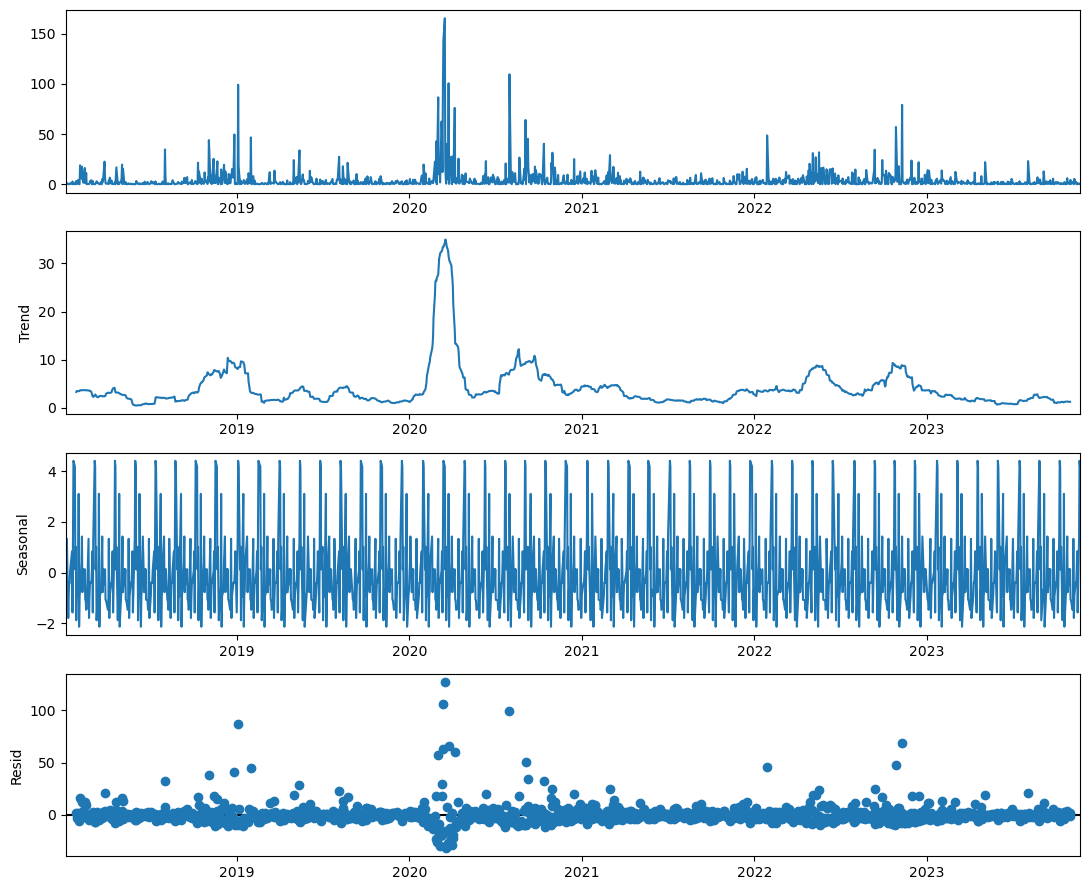

In [16]:
# Apple

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(appl_vol,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

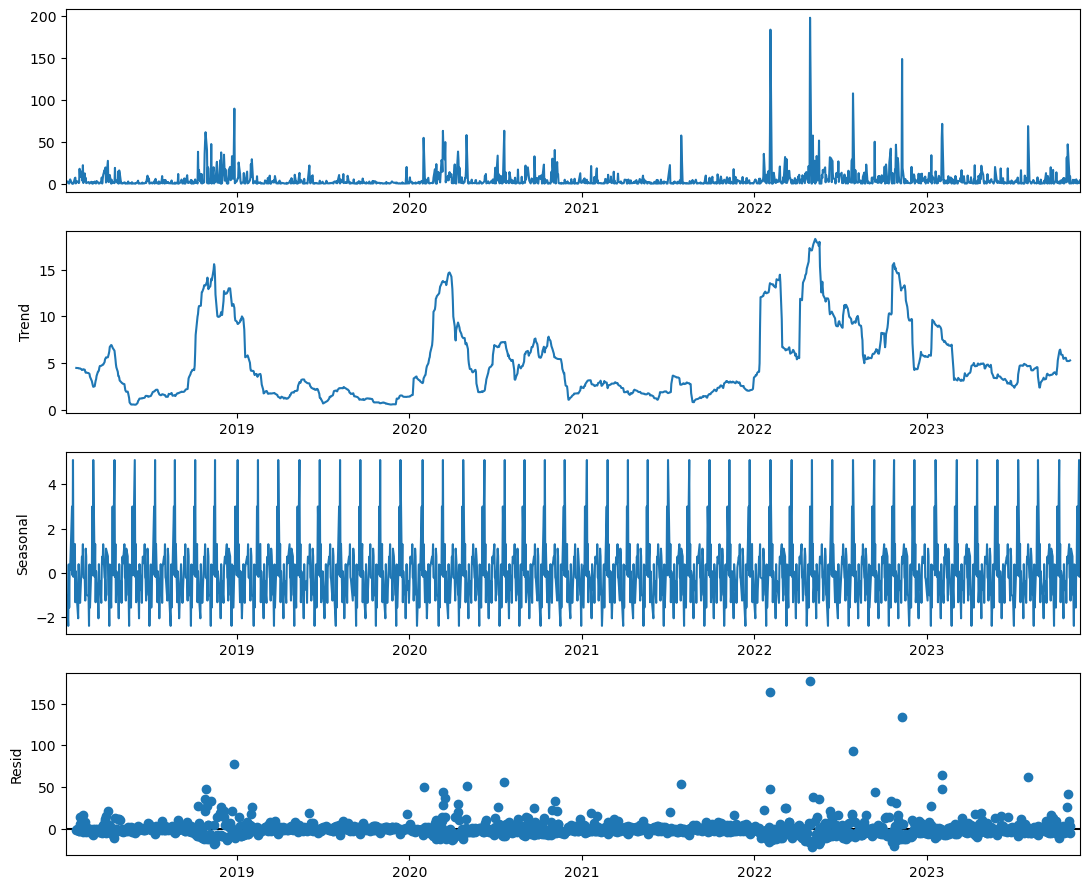

In [18]:
#Amazon

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(amzn_vol,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

### Correlations

Text(0.5, 1.0, 'Correlation of stock close price')

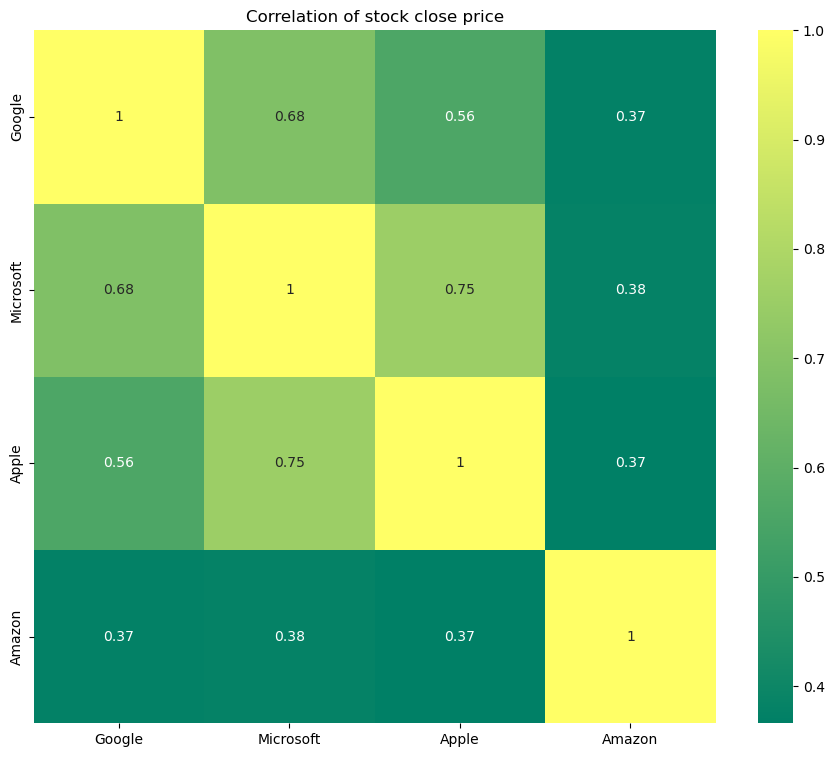

In [19]:
import seaborn as sns
plt.figure()
sns.heatmap(df_all.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock close price')

## Stationarity Check

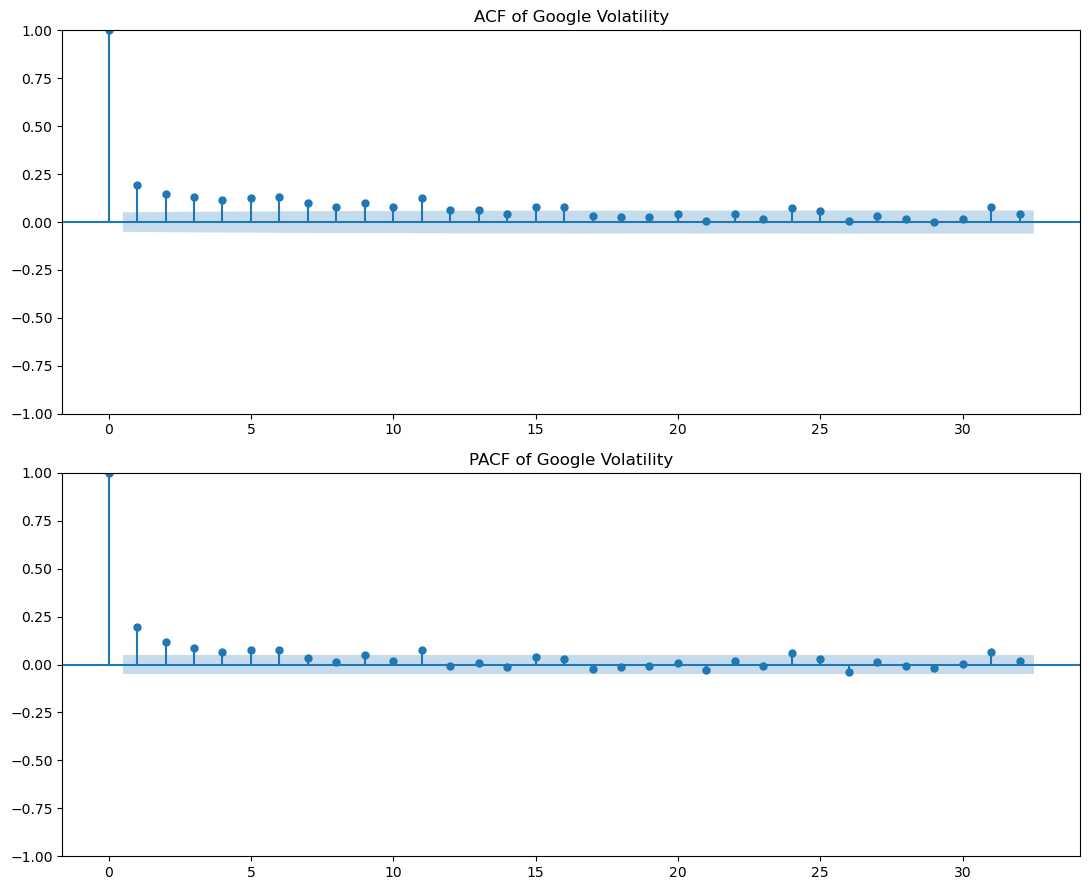

In [20]:
fig, axs = plt.subplots(2)

plot_acf(g_vol, ax=axs[0])
axs[0].set_title('ACF of Google Volatility')
plot_pacf(g_vol, ax=axs[1])
axs[1].set_title('PACF of Google Volatility')

plt.tight_layout()
plt.show()

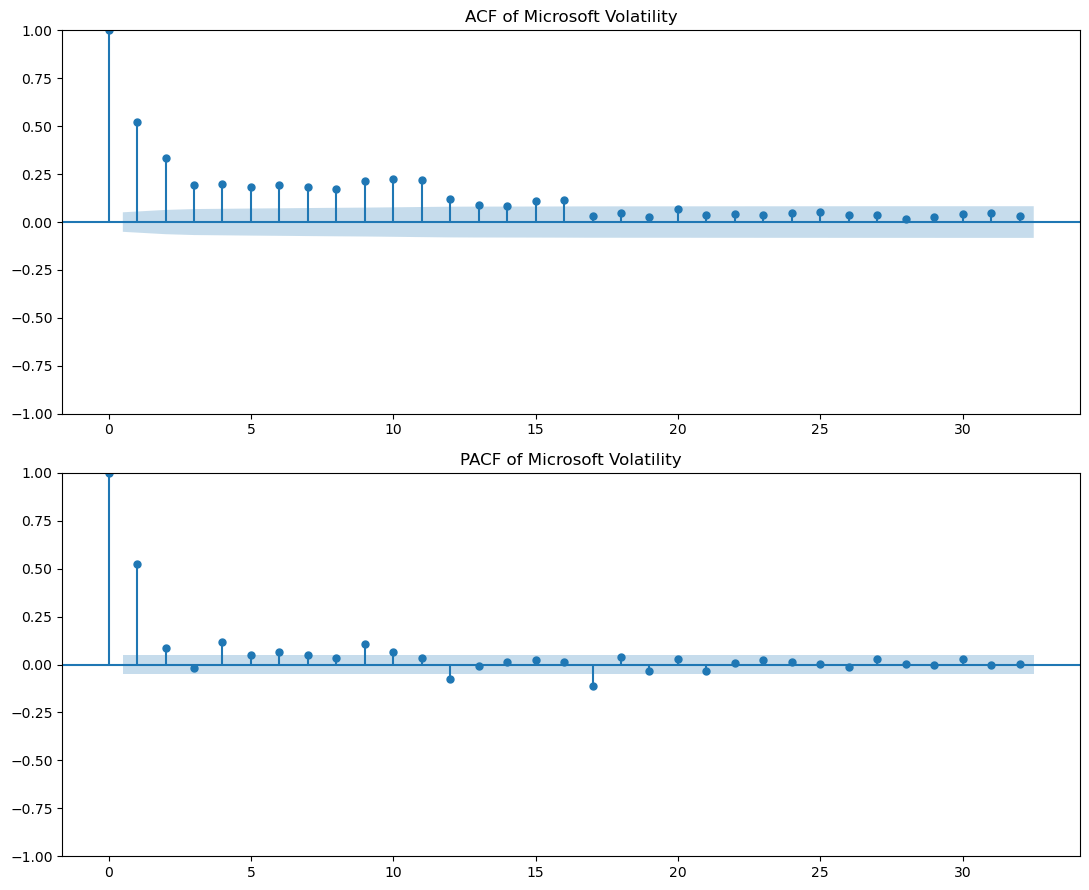

In [21]:
fig, axs = plt.subplots(2)

plot_acf(ms_vol, ax=axs[0])
axs[0].set_title('ACF of Microsoft Volatility')
plot_pacf(ms_vol, ax=axs[1])
axs[1].set_title('PACF of Microsoft Volatility')

plt.tight_layout()
plt.show()

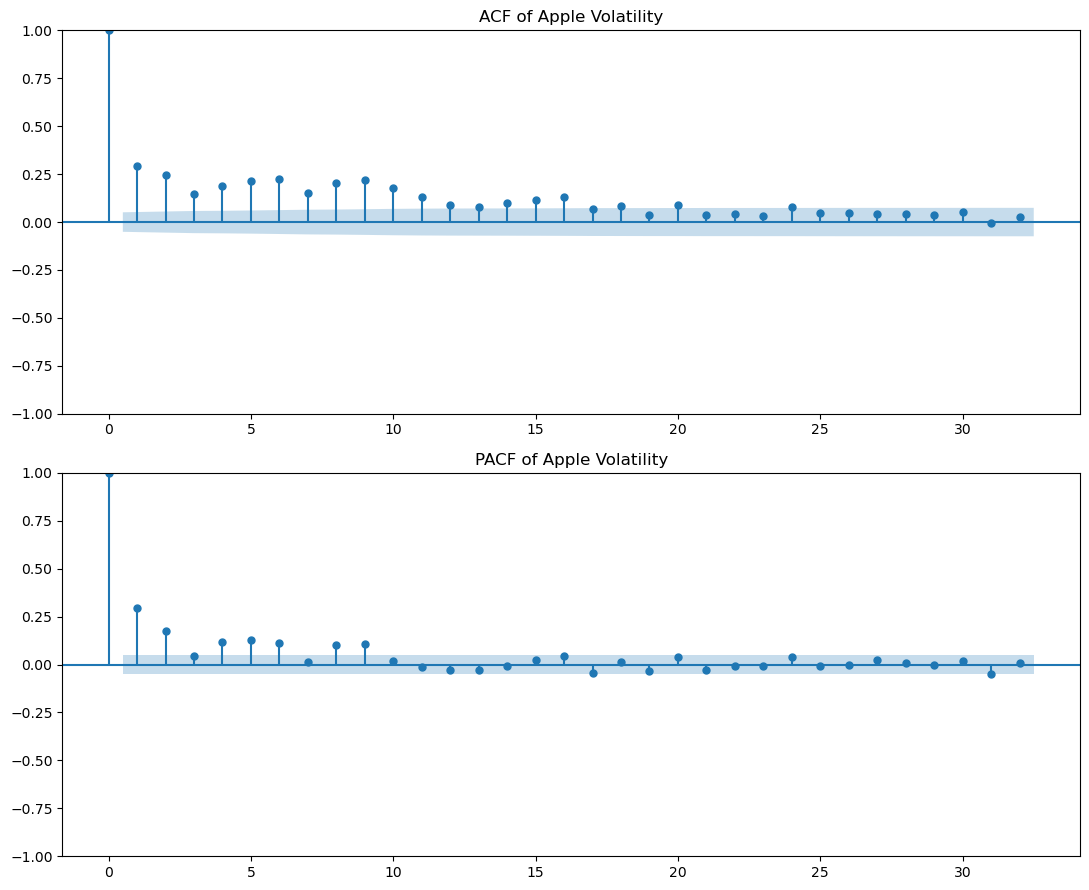

In [22]:
fig, axs = plt.subplots(2)

plot_acf(appl_vol, ax=axs[0])
axs[0].set_title('ACF of Apple Volatility')
plot_pacf(appl_vol, ax=axs[1])
axs[1].set_title('PACF of Apple Volatility')

plt.tight_layout()
plt.show()

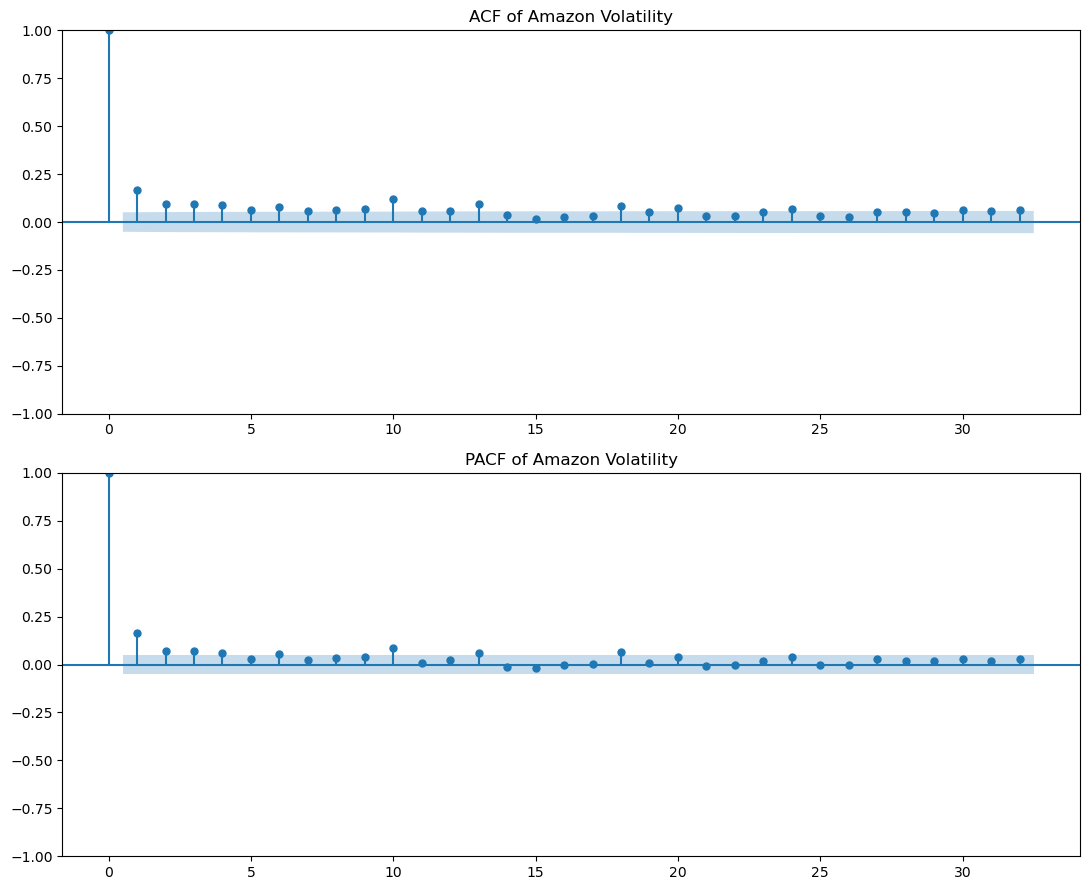

In [23]:
fig, axs = plt.subplots(2)

plot_acf(amzn_vol, ax=axs[0])
axs[0].set_title('ACF of Amazon Volatility')
plot_pacf(amzn_vol, ax=axs[1])
axs[1].set_title('PACF of Amazon Volatility')

plt.tight_layout()
plt.show()

### Transform them to stationary

In [59]:
#放在这儿备用，确认没用后删

#g_diff = g_close.diff().dropna()
#ms_diff = ms_close.diff().dropna()
#amzn_diff = amzn_close.diff().dropna()
#appl_diff = appl_close.diff().dropna()

### The Augmented Dickey-Fuller test

In [24]:
from statsmodels.tsa.stattools import adfuller

goo_adftest = adfuller(g_vol)
goo_adf_results= pd.Series(goo_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in goo_adftest[4].items():
    goo_adf_results['Critical Value (%s)'%key] = value
goo_adf_results

Test Statistic                -7.871516e+00
p-value                        4.970557e-12
#Lags Used                     1.000000e+01
Number of Observations Used    1.472000e+03
Critical Value (1%)           -3.434800e+00
Critical Value (5%)           -2.863505e+00
Critical Value (10%)          -2.567816e+00
dtype: float64

In [25]:
from statsmodels.tsa.stattools import adfuller

ms_adftest = adfuller(ms_vol)
ms_adf_results= pd.Series(ms_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in ms_adftest[4].items():
    ms_adf_results['Critical Value (%s)'%key] = value
ms_adf_results

Test Statistic                -7.136796e+00
p-value                        3.404529e-10
#Lags Used                     1.600000e+01
Number of Observations Used    1.466000e+03
Critical Value (1%)           -3.434818e+00
Critical Value (5%)           -2.863514e+00
Critical Value (10%)          -2.567821e+00
dtype: float64

In [26]:
from statsmodels.tsa.stattools import adfuller

amzn_adftest = adfuller(amzn_vol)
amzn_adf_results= pd.Series(amzn_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in amzn_adftest[4].items():
    amzn_adf_results['Critical Value (%s)'%key] = value
amzn_adf_results

Test Statistic                -7.485335e+00
p-value                        4.655210e-11
#Lags Used                     1.200000e+01
Number of Observations Used    1.470000e+03
Critical Value (1%)           -3.434806e+00
Critical Value (5%)           -2.863508e+00
Critical Value (10%)          -2.567818e+00
dtype: float64

In [27]:
appl_adftest = adfuller(appl_vol)
appl_adf_results= pd.Series(appl_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in appl_adftest[4].items():
    appl_adf_results['Critical Value (%s)'%key] = value
appl_adf_results

Test Statistic                -7.076020e+00
p-value                        4.799814e-10
#Lags Used                     8.000000e+00
Number of Observations Used    1.474000e+03
Critical Value (1%)           -3.434794e+00
Critical Value (5%)           -2.863503e+00
Critical Value (10%)          -2.567815e+00
dtype: float64

In [31]:
# Reject all H0, unit root doesn't exists. All stationary(trend-stationary).

# 3. Fit VAR model

In [28]:
# Train (90%) & Test (10%) Split

nobs = round(0.1*len(df_all))
train, test = df_all[0:-nobs], df_all[-nobs:]

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1335 entries, 2018-01-03 00:00:00-05:00 to 2023-04-24 00:00:00-04:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     1335 non-null   float64
 1   Microsoft  1335 non-null   float64
 2   Apple      1335 non-null   float64
 3   Amazon     1335 non-null   float64
dtypes: float64(4)
memory usage: 52.1 KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2023-04-25 00:00:00-04:00 to 2023-11-22 00:00:00-05:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     148 non-null    float64
 1   Microsoft  148 non-null    float64
 2   Apple      148 non-null    float64
 3   Amazon     148 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


In [31]:
model = VAR(df_all)
aic=[]
for i in range(30):
    result = model.fit(i)
    aic.append(result.aic)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    


Lag Order = 0
AIC :  17.20437575768606
BIC :  17.218676020240714
FPE :  29632306.457969625
HQIC:  17.20970616336595 

Lag Order = 1
AIC :  16.85162858884114
BIC :  16.92316904506052
FPE :  20824249.173006866
HQIC:  16.87829610758536 

Lag Order = 2
AIC :  16.807536951337433
BIC :  16.93638031481727
FPE :  19926031.487452425
HQIC:  16.855566401904415 

Lag Order = 3
AIC :  16.81154493132135
BIC :  16.99775402799123
FPE :  20006079.066041917
HQIC:  16.88096117817151 

Lag Order = 4
AIC :  16.798335181969026
BIC :  17.041972950369523
FPE :  19743585.89747877
HQIC:  16.889163135379427 

Lag Order = 5
AIC :  16.775621573144026
BIC :  17.076751064704705
FPE :  19300261.886793043
HQIC:  16.887886189323396 

Lag Order = 6
AIC :  16.769471275527074
BIC :  17.12815565484538
FPE :  19182025.165492196
HQIC:  16.903197556731183 

Lag Order = 7
AIC :  16.784836454546628
BIC :  17.201138999667634
FPE :  19479178.52153152
HQIC:  16.94004944919405 

Lag Order = 8
AIC :  16.79539591262808
BIC :  17.2693

In [32]:
aic.sort()
aic

[16.769471275527074,
 16.775621573144026,
 16.784836454546628,
 16.78489075217503,
 16.786854291658695,
 16.791813015464836,
 16.79539591262808,
 16.798335181969026,
 16.80600671202359,
 16.807536951337433,
 16.81154493132135,
 16.81231976025415,
 16.826918287919572,
 16.840896806887187,
 16.85162858884114,
 16.856475643652878,
 16.863874906347395,
 16.879524094136368,
 16.89545115216614,
 16.904169579156868,
 16.919243521810838,
 16.931283612736728,
 16.937961558285153,
 16.950821884775923,
 16.957170095970596,
 16.96495533069965,
 16.98099157342736,
 16.996519080520688,
 17.00636349023871,
 17.20437575768606]

In [37]:
# lag=6时有最小的AIC

In [33]:
# According to AIC check, the explicitly computed AIC is the lowest at lag 1.

model = VAR(train)
model_fitted = model.fit(6)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Nov, 2023
Time:                     17:44:47
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    17.2714
Nobs:                     1329.00    HQIC:                   17.0272
Log likelihood:          -18660.3    FPE:                2.14395e+07
AIC:                      16.8807    Det(Omega_mle):     1.98994e+07
--------------------------------------------------------------------
Results for equation Google
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                1.884577         0.344339            5.473           0.000
L1.Google           -0.020723         0.038044           -0.545           0.586
L1.Microsoft         0.213539         0.045945            4.648

## Granger Casuality Check

In [39]:
# As the data is stationary, so we can now conduct Granger Casuality Check

In [35]:
from statsmodels.tsa.stattools import grangercausalitytests

In [36]:
for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        if i != j:
            print(f"\nGranger Causality test for {df_all.columns[j]} caused by {df_all.columns[i]}:")
            grangercausalitytests(df_all[[df_all.columns[j], df_all.columns[i]]], maxlag=30)



Granger Causality test for Microsoft caused by Google:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8923  , p=0.1692  , df_denom=1479, df_num=1
ssr based chi2 test:   chi2=1.8961  , p=0.1685  , df=1
likelihood ratio test: chi2=1.8949  , p=0.1686  , df=1
parameter F test:         F=1.8923  , p=0.1692  , df_denom=1479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2432  , p=0.0145  , df_denom=1476, df_num=2
ssr based chi2 test:   chi2=8.5151  , p=0.0142  , df=2
likelihood ratio test: chi2=8.4908  , p=0.0143  , df=2
parameter F test:         F=4.2432  , p=0.0145  , df_denom=1476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.8710  , p=0.0006  , df_denom=1473, df_num=3
ssr based chi2 test:   chi2=17.6966 , p=0.0005  , df=3
likelihood ratio test: chi2=17.5916 , p=0.0005  , df=3
parameter F test:         F=5.8710  , p=0.0006  , df_denom=1473, df_num=3

Granger Causality
number of lag

ssr based F test:         F=3.2538  , p=0.0011  , df_denom=1458, df_num=8
ssr based chi2 test:   chi2=26.3340 , p=0.0009  , df=8
likelihood ratio test: chi2=26.1017 , p=0.0010  , df=8
parameter F test:         F=3.2538  , p=0.0011  , df_denom=1458, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.1540  , p=0.0009  , df_denom=1455, df_num=9
ssr based chi2 test:   chi2=28.7564 , p=0.0007  , df=9
likelihood ratio test: chi2=28.4795 , p=0.0008  , df=9
parameter F test:         F=3.1540  , p=0.0009  , df_denom=1455, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.3000  , p=0.0003  , df_denom=1452, df_num=10
ssr based chi2 test:   chi2=33.4772 , p=0.0002  , df=10
likelihood ratio test: chi2=33.1025 , p=0.0003  , df=10
parameter F test:         F=3.3000  , p=0.0003  , df_denom=1452, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=3.2282  , p=0.0002  , df_denom=1449, df_num=11
ssr bas

ssr based F test:         F=19.2132 , p=0.0000  , df_denom=1467, df_num=5
ssr based chi2 test:   chi2=96.7863 , p=0.0000  , df=5
likelihood ratio test: chi2=93.7492 , p=0.0000  , df=5
parameter F test:         F=19.2132 , p=0.0000  , df_denom=1467, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=15.9628 , p=0.0000  , df_denom=1464, df_num=6
ssr based chi2 test:   chi2=96.6276 , p=0.0000  , df=6
likelihood ratio test: chi2=93.5982 , p=0.0000  , df=6
parameter F test:         F=15.9628 , p=0.0000  , df_denom=1464, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=13.6012 , p=0.0000  , df_denom=1461, df_num=7
ssr based chi2 test:   chi2=96.1862 , p=0.0000  , df=7
likelihood ratio test: chi2=93.1820 , p=0.0000  , df=7
parameter F test:         F=13.6012 , p=0.0000  , df_denom=1461, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=12.0318 , p=0.0000  , df_denom=1458, df_num=8
ssr based chi2

ssr based F test:         F=4.2856  , p=0.0000  , df_denom=1425, df_num=19
ssr based chi2 test:   chi2=83.6555 , p=0.0000  , df=19
likelihood ratio test: chi2=81.3527 , p=0.0000  , df=19
parameter F test:         F=4.2856  , p=0.0000  , df_denom=1425, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=4.0913  , p=0.0000  , df_denom=1422, df_num=20
ssr based chi2 test:   chi2=84.1855 , p=0.0000  , df=20
likelihood ratio test: chi2=81.8524 , p=0.0000  , df=20
parameter F test:         F=4.0913  , p=0.0000  , df_denom=1422, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=3.9028  , p=0.0000  , df_denom=1419, df_num=21
ssr based chi2 test:   chi2=84.4432 , p=0.0000  , df=21
likelihood ratio test: chi2=82.0946 , p=0.0000  , df=21
parameter F test:         F=3.9028  , p=0.0000  , df_denom=1419, df_num=21

Granger Causality
number of lags (no zero) 22
ssr based F test:         F=3.7529  , p=0.0000  , df_denom=1416, df_num=2

likelihood ratio test: chi2=67.5464 , p=0.0000  , df=17
parameter F test:         F=3.9692  , p=0.0000  , df_denom=1431, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=3.8571  , p=0.0000  , df_denom=1428, df_num=18
ssr based chi2 test:   chi2=71.2269 , p=0.0000  , df=18
likelihood ratio test: chi2=69.5496 , p=0.0000  , df=18
parameter F test:         F=3.8571  , p=0.0000  , df_denom=1428, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=3.6255  , p=0.0000  , df_denom=1425, df_num=19
ssr based chi2 test:   chi2=70.7692 , p=0.0000  , df=19
likelihood ratio test: chi2=69.1120 , p=0.0000  , df=19
parameter F test:         F=3.6255  , p=0.0000  , df_denom=1425, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=3.4823  , p=0.0000  , df_denom=1422, df_num=20
ssr based chi2 test:   chi2=71.6535 , p=0.0000  , df=20
likelihood ratio test: chi2=69.9541 , p=0.0000  , df=20
parameter F test:

likelihood ratio test: chi2=70.0442 , p=0.0000  , df=26
parameter F test:         F=2.6594  , p=0.0000  , df_denom=1404, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=2.5899  , p=0.0000  , df_denom=1401, df_num=27
ssr based chi2 test:   chi2=72.6723 , p=0.0000  , df=27
likelihood ratio test: chi2=70.9169 , p=0.0000  , df=27
parameter F test:         F=2.5899  , p=0.0000  , df_denom=1401, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=2.5653  , p=0.0000  , df_denom=1398, df_num=28
ssr based chi2 test:   chi2=74.7579 , p=0.0000  , df=28
likelihood ratio test: chi2=72.9007 , p=0.0000  , df=28
parameter F test:         F=2.5653  , p=0.0000  , df_denom=1398, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=2.5165  , p=0.0000  , df_denom=1395, df_num=29
ssr based chi2 test:   chi2=76.0656 , p=0.0000  , df=29
likelihood ratio test: chi2=74.1427 , p=0.0000  , df=29
parameter F test:

likelihood ratio test: chi2=35.6462 , p=0.0000  , df=7
parameter F test:         F=5.1019  , p=0.0000  , df_denom=1461, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=5.0647  , p=0.0000  , df_denom=1458, df_num=8
ssr based chi2 test:   chi2=40.9897 , p=0.0000  , df=8
likelihood ratio test: chi2=40.4305 , p=0.0000  , df=8
parameter F test:         F=5.0647  , p=0.0000  , df_denom=1458, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=5.8454  , p=0.0000  , df_denom=1455, df_num=9
ssr based chi2 test:   chi2=53.2959 , p=0.0000  , df=9
likelihood ratio test: chi2=52.3550 , p=0.0000  , df=9
parameter F test:         F=5.8454  , p=0.0000  , df_denom=1455, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.4762  , p=0.0000  , df_denom=1452, df_num=10
ssr based chi2 test:   chi2=55.5543 , p=0.0000  , df=10
likelihood ratio test: chi2=54.5323 , p=0.0000  , df=10
parameter F test:         F=5

ssr based F test:         F=3.9987  , p=0.0002  , df_denom=1461, df_num=7
ssr based chi2 test:   chi2=28.2783 , p=0.0002  , df=7
likelihood ratio test: chi2=28.0108 , p=0.0002  , df=7
parameter F test:         F=3.9987  , p=0.0002  , df_denom=1461, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=3.5199  , p=0.0005  , df_denom=1458, df_num=8
ssr based chi2 test:   chi2=28.4878 , p=0.0004  , df=8
likelihood ratio test: chi2=28.2162 , p=0.0004  , df=8
parameter F test:         F=3.5199  , p=0.0005  , df_denom=1458, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.4080  , p=0.0004  , df_denom=1455, df_num=9
ssr based chi2 test:   chi2=31.0725 , p=0.0003  , df=9
likelihood ratio test: chi2=30.7496 , p=0.0003  , df=9
parameter F test:         F=3.4080  , p=0.0004  , df_denom=1455, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.9359  , p=0.0012  , df_denom=1452, df_num=10
ssr based ch

ssr based F test:         F=0.7317  , p=0.7328  , df_denom=1443, df_num=13
ssr based chi2 test:   chi2=9.6906  , p=0.7190  , df=13
likelihood ratio test: chi2=9.6588  , p=0.7216  , df=13
parameter F test:         F=0.7317  , p=0.7328  , df_denom=1443, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=0.7033  , p=0.7729  , df_denom=1440, df_num=14
ssr based chi2 test:   chi2=10.0438 , p=0.7590  , df=14
likelihood ratio test: chi2=10.0097 , p=0.7615  , df=14
parameter F test:         F=0.7033  , p=0.7729  , df_denom=1440, df_num=14

Granger Causality
number of lags (no zero) 15
ssr based F test:         F=0.6368  , p=0.8462  , df_denom=1437, df_num=15
ssr based chi2 test:   chi2=9.7587  , p=0.8346  , df=15
likelihood ratio test: chi2=9.7264  , p=0.8366  , df=15
parameter F test:         F=0.6368  , p=0.8462  , df_denom=1437, df_num=15

Granger Causality
number of lags (no zero) 16
ssr based F test:         F=0.6309  , p=0.8609  , df_denom=1434, df_num=1

ssr based F test:         F=1.3009  , p=0.2050  , df_denom=1443, df_num=13
ssr based chi2 test:   chi2=17.2279 , p=0.1891  , df=13
likelihood ratio test: chi2=17.1278 , p=0.1935  , df=13
parameter F test:         F=1.3009  , p=0.2050  , df_denom=1443, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=1.2568  , p=0.2275  , df_denom=1440, df_num=14
ssr based chi2 test:   chi2=17.9502 , p=0.2091  , df=14
likelihood ratio test: chi2=17.8414 , p=0.2141  , df=14
parameter F test:         F=1.2568  , p=0.2275  , df_denom=1440, df_num=14

Granger Causality
number of lags (no zero) 15
ssr based F test:         F=1.2269  , p=0.2437  , df_denom=1437, df_num=15
ssr based chi2 test:   chi2=18.8009 , p=0.2229  , df=15
likelihood ratio test: chi2=18.6815 , p=0.2285  , df=15
parameter F test:         F=1.2269  , p=0.2437  , df_denom=1437, df_num=15

Granger Causality
number of lags (no zero) 16
ssr based F test:         F=1.1469  , p=0.3053  , df_denom=1434, df_num=1

ssr based F test:         F=0.8353  , p=0.6881  , df_denom=1413, df_num=23
ssr based chi2 test:   chi2=19.8516 , p=0.6508  , df=23
likelihood ratio test: chi2=19.7179 , p=0.6589  , df=23
parameter F test:         F=0.8353  , p=0.6881  , df_denom=1413, df_num=23

Granger Causality
number of lags (no zero) 24
ssr based F test:         F=0.8331  , p=0.6963  , df_denom=1410, df_num=24
ssr based chi2 test:   chi2=20.6885 , p=0.6570  , df=24
likelihood ratio test: chi2=20.5432 , p=0.6655  , df=24
parameter F test:         F=0.8331  , p=0.6963  , df_denom=1410, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=0.8077  , p=0.7357  , df_denom=1407, df_num=25
ssr based chi2 test:   chi2=20.9234 , p=0.6969  , df=25
likelihood ratio test: chi2=20.7747 , p=0.7051  , df=25
parameter F test:         F=0.8077  , p=0.7357  , df_denom=1407, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=0.8145  , p=0.7316  , df_denom=1404, df_num=2

In [37]:
results_df = pd.DataFrame(columns=df_all.columns, index=df_all.columns)

for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        if i != j:
            
            test_result=grangercausalitytests(df_all[[df_all.columns[j], df_all.columns[i]]], maxlag=30, verbose=False)
            
            # Get the p-value of the F-test for the last lag
            p_value = test_result[2][0]['ssr_ftest'][1]
            
            # If the p-value is less than 0.05, we reject the null hypothesis and conclude that
            # the column variable Granger-causes the index variable
            results_df.loc[df_all.columns[j], df_all.columns[i]] = p_value < 0.05

print(results_df)

          Google Microsoft Apple Amazon
Google       NaN      True  True  False
Microsoft   True       NaN  True  False
Apple       True      True   NaN  False
Amazon      True      True  True    NaN


### DW-Test of the residuals

In [38]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)
for col, val in zip(train.columns, out):
    print(col, ':', round(val, 4))


Google : 2.0061
Microsoft : 1.9991
Apple : 2.0033
Amazon : 2.0031


# 4. Forecast

## Simple Forecast

In [39]:
lag_order = model_fitted.k_ar
print(lag_order)

6


In [40]:
forecast_input = train.values[-lag_order:]
forecast_input

array([[7.71323474e+00, 8.64179759e-01, 1.46455188e-04, 5.03392861e-02],
       [1.49223476e+00, 2.21676076e-02, 5.63213211e-01, 1.83407042e-01],
       [9.05070242e-03, 7.69680275e-04, 4.85566005e-01, 3.82215855e+00],
       [7.02143959e-01, 6.58122756e-01, 3.41804995e-01, 2.20715714e-01],
       [8.92059039e-05, 1.49609016e-02, 9.56637732e-01, 9.20753051e+00],
       [6.74776057e-01, 1.94959406e+00, 3.52895956e-02, 4.91676833e-01]])

In [41]:
# Forecast
fore = model_fitted.forecast(y=forecast_input, steps=nobs)
forecast = pd.DataFrame(fore, index=df_all.index[-nobs:], columns=test.columns )
forecast

,Google,Microsoft,Apple,Amazon
Date,,,,
2023-04-25 00:00:00-04:00,3.080252,2.041933,2.406681,2.240219
2023-04-26 00:00:00-04:00,2.705743,2.015034,2.725298,3.605511
2023-04-27 00:00:00-04:00,2.294330,1.206737,1.845080,3.957492
2023-04-28 00:00:00-04:00,2.632762,1.747399,2.616762,3.383468
2023-05-01 00:00:00-04:00,2.885332,1.884388,2.313343,4.047412
...,...,...,...,...
2023-11-16 00:00:00-05:00,4.005892,3.816489,4.351341,5.134543
2023-11-17 00:00:00-05:00,4.005892,3.816489,4.351341,5.134543
2023-11-20 00:00:00-05:00,4.005892,3.816489,4.351341,5.134543


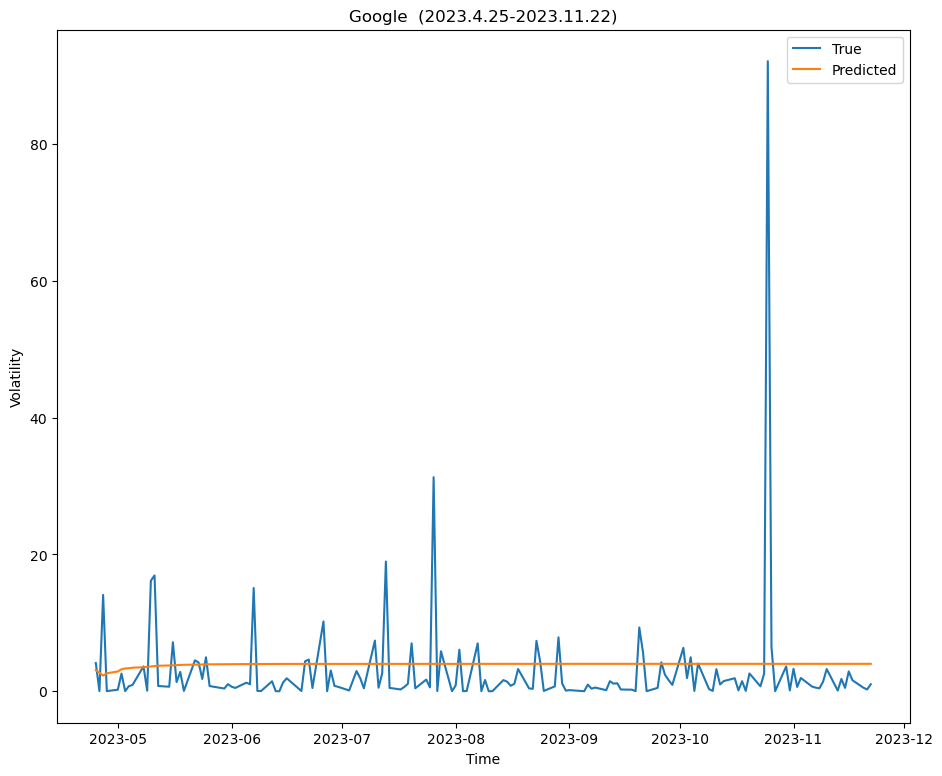

In [43]:
plt.plot(test['Google'], label='True')
plt.plot(forecast['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

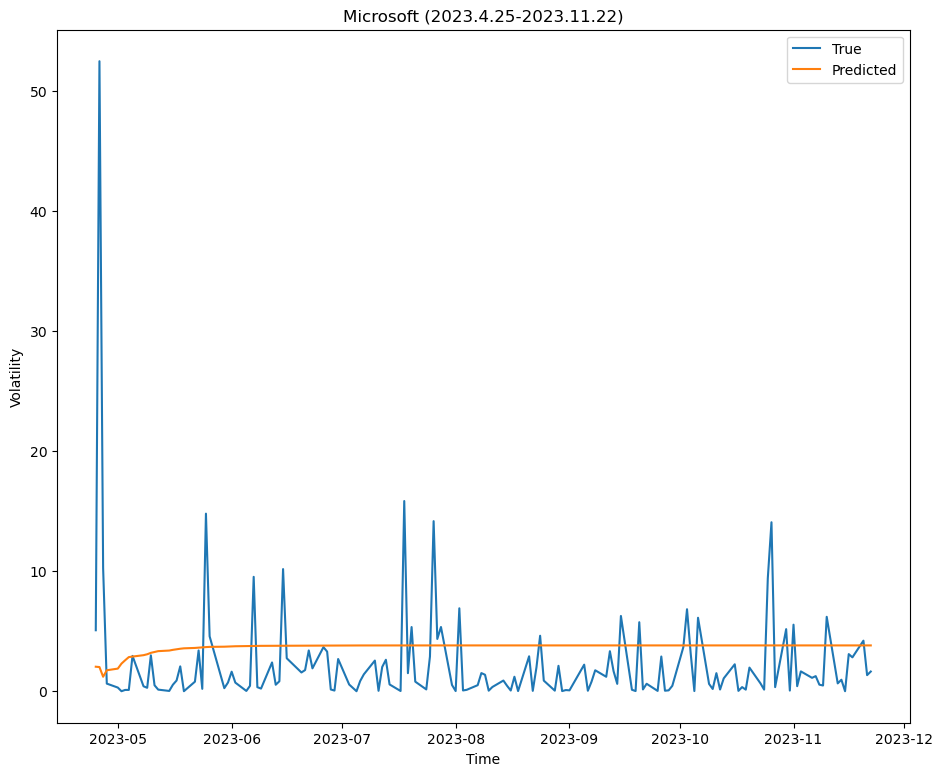

In [44]:
plt.plot(test['Microsoft'], label='True')
plt.plot(forecast['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

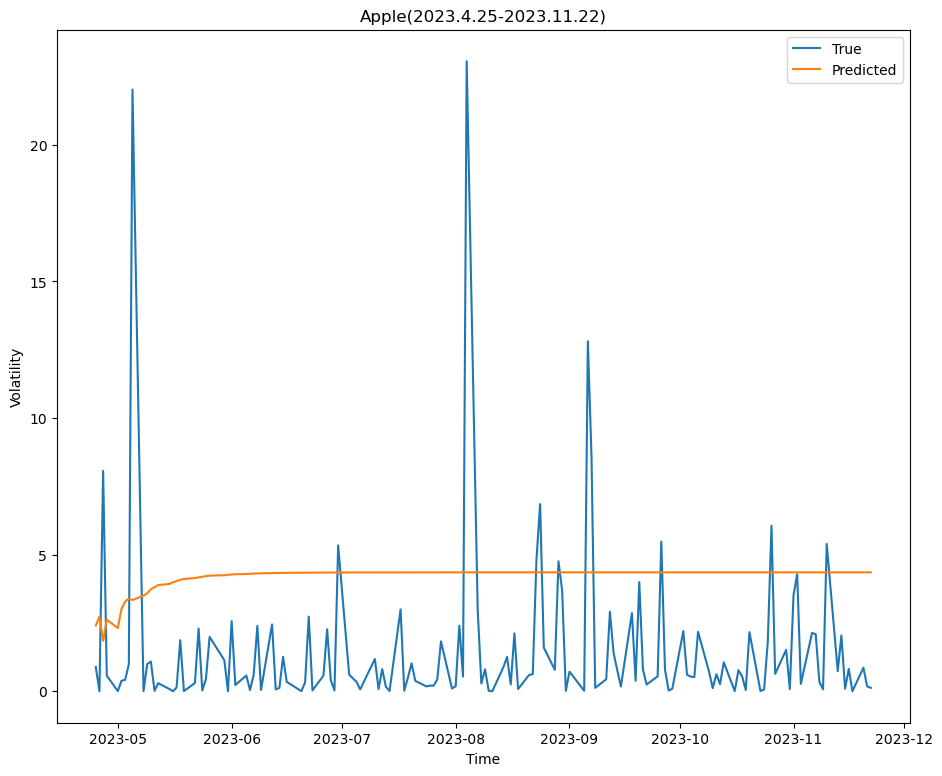

In [45]:
plt.plot(test['Apple'], label='True')
plt.plot(forecast['Apple'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Apple(2023.4.25-2023.11.22)')
plt.legend()
plt.show()

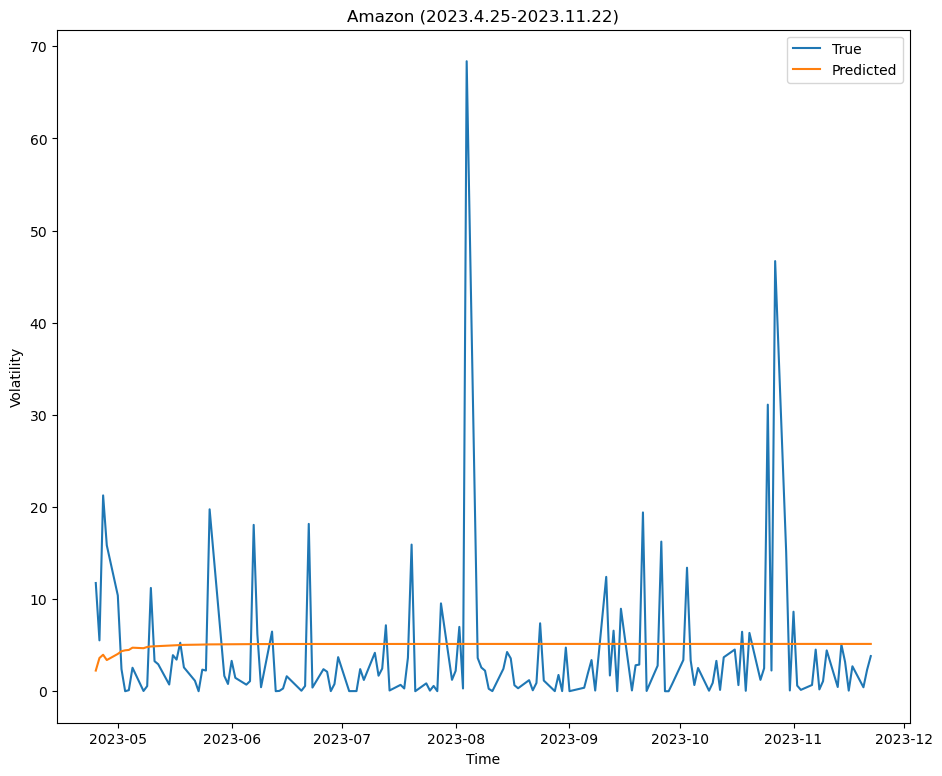

In [46]:
plt.plot(test['Amazon'], label='True')
plt.plot(forecast['Amazon'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Amazon (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

### Calculate the accuracy

In [47]:
def forecast_accuracy(forecast, actual):
    
    mse =np.mean((forecast - actual)**2)
    rmse = np.mean((forecast - actual)**2)**.5  

    return({'mse':mse,'rmse':rmse})

In [48]:
print('Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(forecast['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\nForecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(forecast['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: Google
mse :  71.9876
rmse :  8.4846

Forecast Accuracy of: Microsoft
mse :  29.1242
rmse :  5.3967


## Rolling Forecast

In [49]:
rolling_predictions = pd.DataFrame()
test_size = 148

for i in range(test_size):
    train = df_all[:-(test_size-i)]  
    
    forecast_input = train.values[-lag_order:]
    
    model = VAR(train)
    model_fitted = model.fit(lag_order)
    pred = model_fitted.forecast(y=forecast_input, steps=1)
    forecast = pd.DataFrame(pred, columns=df_all.columns )
    rolling_predictions = rolling_predictions.append(forecast)

In [50]:
rolling_predictions.index = test.index
rolling_predictions

,Google,Microsoft,Apple,Amazon
Date,,,,
2023-04-25 00:00:00-04:00,3.080252,2.041933,2.406681,2.240219
2023-04-26 00:00:00-04:00,3.173831,2.609909,2.981281,4.720684
2023-04-27 00:00:00-04:00,12.969135,23.069438,13.465780,4.865706
2023-04-28 00:00:00-04:00,0.807227,2.276487,2.886027,9.971773
2023-05-01 00:00:00-04:00,-5.897852,-10.950805,-8.420478,-0.994121
...,...,...,...,...
2023-11-16 00:00:00-05:00,2.521631,1.453645,1.912248,3.213044
2023-11-17 00:00:00-05:00,3.338690,2.513600,3.157177,3.377852
2023-11-20 00:00:00-05:00,3.088240,2.305287,3.161791,4.357885


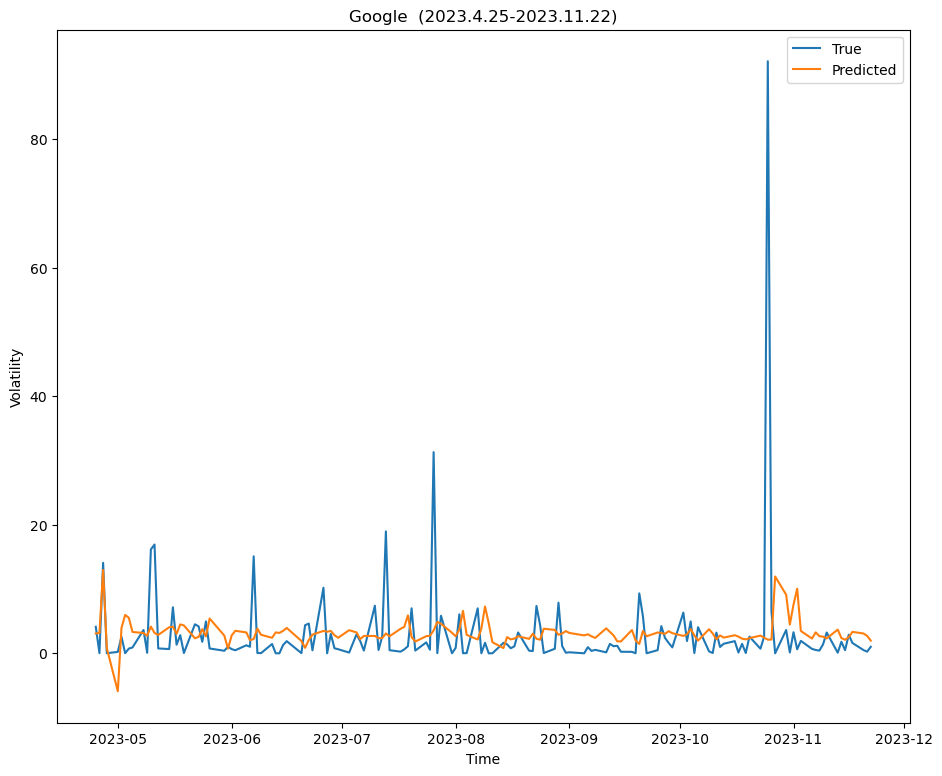

In [51]:
plt.plot(test['Google'], label='True')
plt.plot(rolling_predictions['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

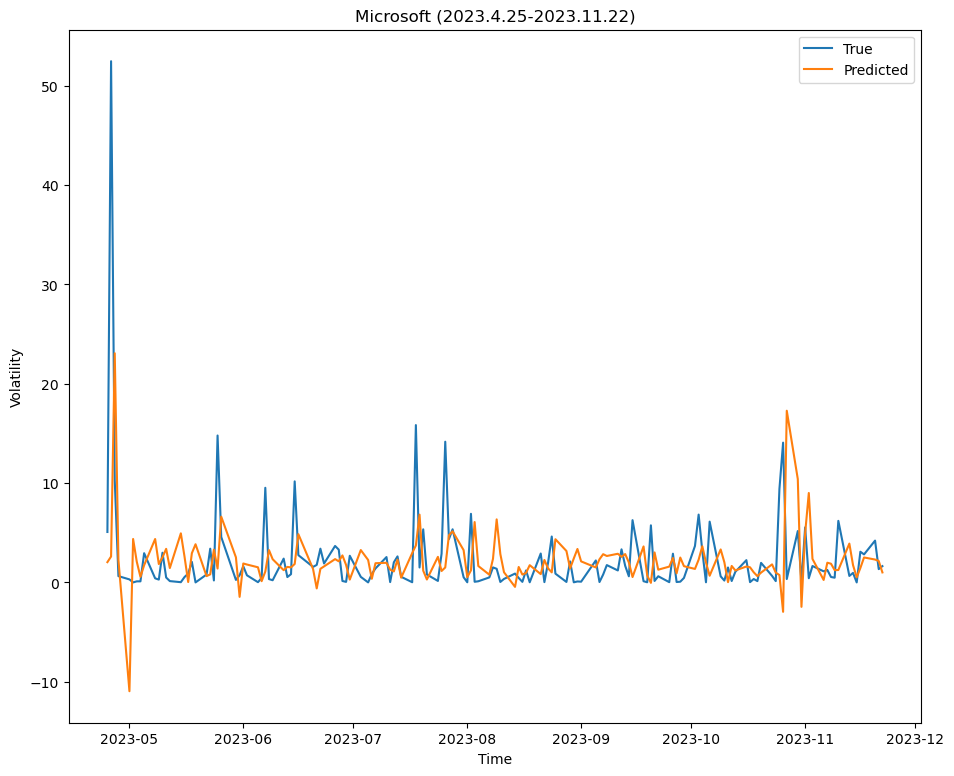

In [52]:
plt.plot(test['Microsoft'], label='True')
plt.plot(rolling_predictions['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

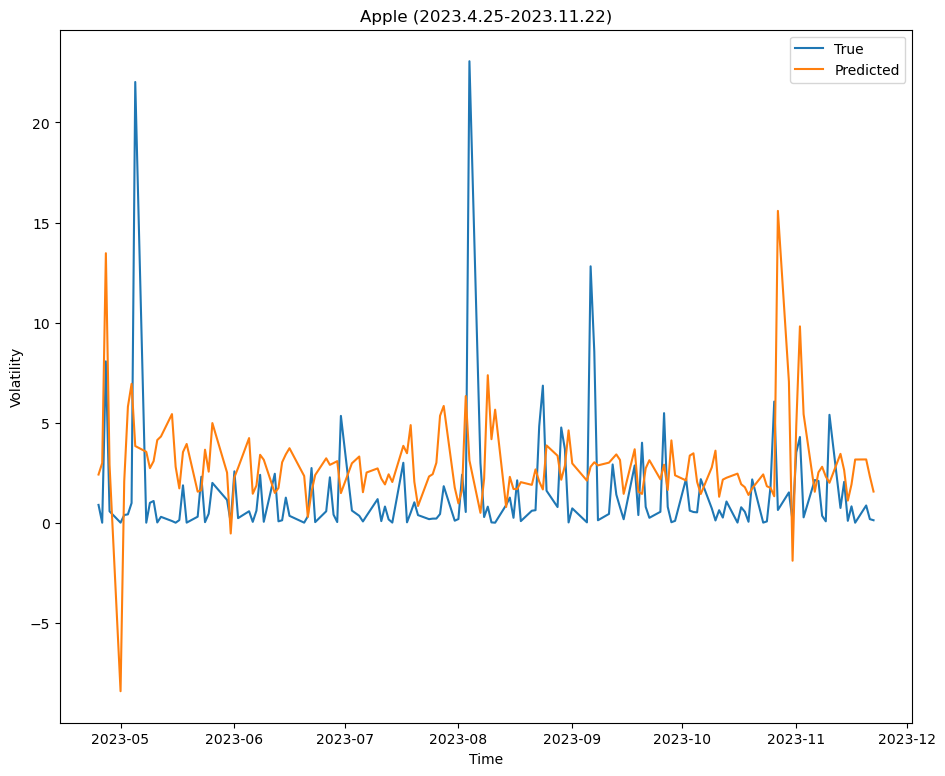

In [53]:
plt.plot(test['Apple'], label='True')
plt.plot(rolling_predictions['Apple'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Apple (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

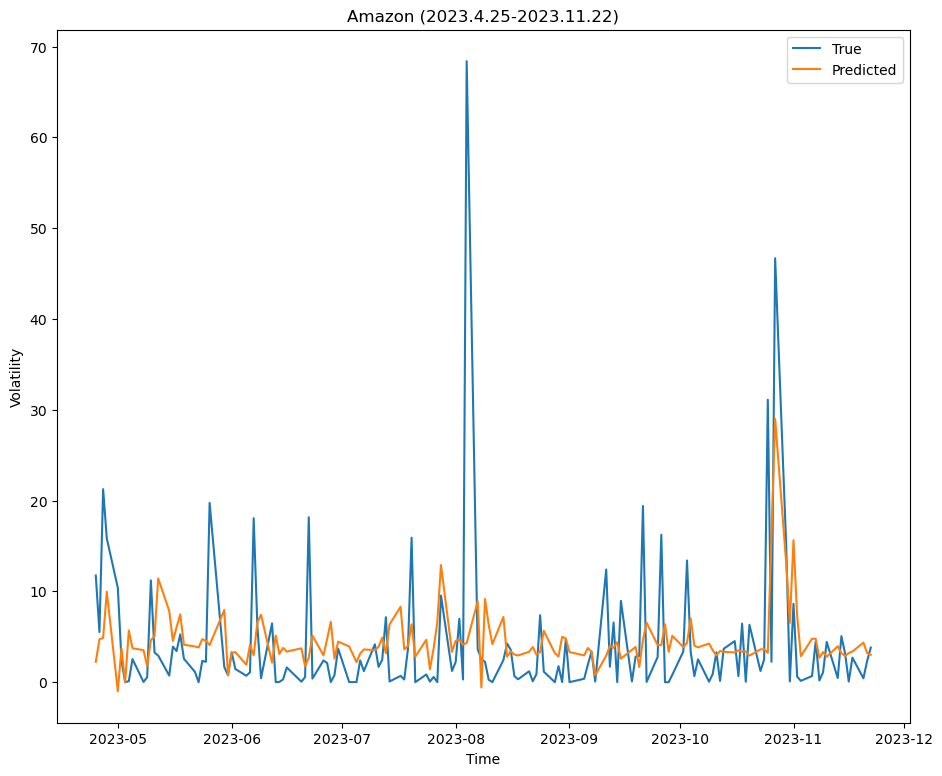

In [54]:
plt.plot(test['Amazon'], label='True')
plt.plot(rolling_predictions['Amazon'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Amazon (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

In [55]:
print('Rolling Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(rolling_predictions['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\n Rolling Forecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(rolling_predictions['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Apple')
accuracy_prod = forecast_accuracy(rolling_predictions['Apple'], test['Apple'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Amazon')
accuracy_prod = forecast_accuracy(rolling_predictions['Amazon'], test['Amazon'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    
    

Rolling Forecast Accuracy of: Google
mse :  74.5274
rmse :  8.6329

 Rolling Forecast Accuracy of: Microsoft
mse :  32.866
rmse :  5.7329

 Rolling Forecast Accuracy of: Apple
mse :  14.8299
rmse :  3.851

 Rolling Forecast Accuracy of: Amazon
mse :  60.0517
rmse :  7.7493


In [56]:
# 这个最好放到ppt上

df_all.describe()

,Google,Microsoft,Apple,Amazon
count,1483.000000,1483.000000,1483.000000,1483.000000
mean,3.898842,3.661597,4.050400,5.031983
std,9.336431,10.575530,10.537975,12.113748
min,0.000003,0.000000,0.000000,0.000000
25%,0.193139,0.191364,0.206293,0.266660
50%,0.979583,1.001244,1.019569,1.317544
75%,3.673367,3.454120,3.715308,4.674764
max,123.228164,217.239630,165.500333,197.386702
